In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# 27 mile width
# 34 mile length
xvals = np.arange(0, 26)
yvals = np.arange(0, 22)

xx, yy = np.meshgrid(xvals, yvals)

In [3]:
xx = xx * 27
yy = yy * 34

In [4]:
points = np.array([xx, yy])
points = np.reshape(np.reshape(points, 22*26*2, order = 'F'), [22*26, 2])

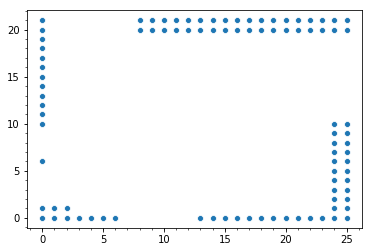

In [5]:
# delete points that are not in states.  y values multiplied by 34, x by 27.

delPoints = list(range(2)) + list(range(6, 7)) + list(range(10,22)) # first column delPoints
delPoints = delPoints + [x+22 for x in list(range(2))] + [x+44 for x in list(range(2))] # 2nd / 3rd column delPoints
delPoints = delPoints + [x*22 for x in list(range(3, 7))]    # 4th through 7th column delPoints

delPoints = delPoints + [x*22 + 21 for x in range(8, 26)]    # highest row past tip of Utah
delPoints = delPoints + [x*22 + 20 for x in range(8, 26)]    # 2nd highest row past tip of Utah

delPoints = delPoints + [x*22 for x in range(13, 26)]   # rest of bottom row
delPoints = delPoints + [24*22 + x for x in range(1, 11)]  # second to last col
delPoints = delPoints + [25*22 + x for x in range(1, 11)]  # last col

# print(delPoints)  # print row indexes of points you are deleting

# plot points you are deleting
ax = sns.scatterplot(points[delPoints,0] / 27, y=points[delPoints,1] / 34)  # create plot, scaled back down.
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))  # set minor y tics in increments of 1.
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))  # set minor x tics in increments of 1.
ax   # display plot

# deleting points in delPoints.
points = np.delete(points, delPoints, axis=0)

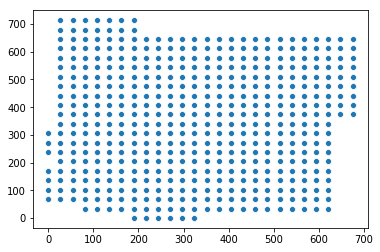

In [6]:
ax = sns.scatterplot(x=points[:,0], y=points[:,1])
ax

In [8]:
#pointsData = pd.DataFrame(points, columns = ['X','Y'])
#pointsData.to_csv('PointsData.csv')

In [7]:
colorChoices = [sns.xkcd_rgb['carolina blue'], sns.xkcd_rgb["neon red"]]   # carolina, baby, aqua for blues
def plotSol(data, colors = colorChoices):
    ax = sns.scatterplot(x='X', y='Y', hue='Solution', palette = sns.color_palette(colors), data = data)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax.set_ylabel('Y', rotation=0, horizontalalignment = 'right')
    ax

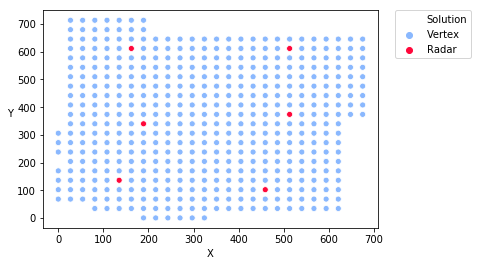

In [8]:
XSol200 = [92, 127, 141, 384, 331, 377]  # REMEMBER TO MINUS ONE FROM AMPL SOL
#plt.show(sns.scatterplot(x = points[XSol200, 0], y = points[XSol200, 1]))

pointsData = pd.DataFrame(points, columns = ['X','Y'])
pointsData['Solution'] = 'Vertex'
pointsData.iloc[XSol200, 2] = 'Radar'

#ax = sns.scatterplot(x='X', y='Y', hue='Solution', palette = sns.color_palette(colorChoices), data = pointsData)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#ax.set_ylabel('Y', rotation=0, horizontalalignment = 'right')
#ax
plotSol(pointsData)

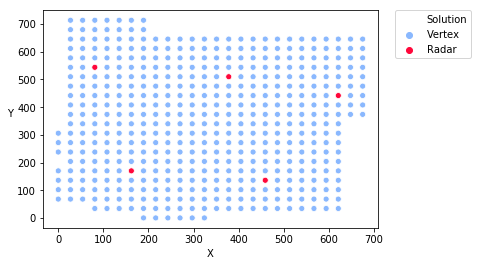

In [10]:
XSol5 = [62, 114, 455, 332, 286]
pointsData['Solution'] = 'Vertex'
pointsData.iloc[XSol5, 2] = 'Radar'

plotSol(pointsData)

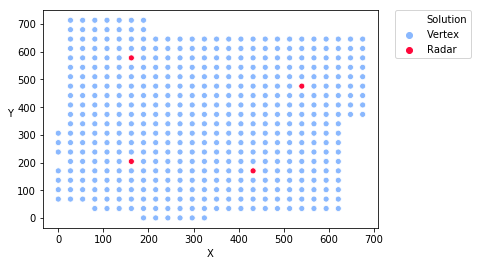

In [11]:
XSol4 = [115, 399, 314, 126]
pointsData['Solution'] = 'Vertex'
pointsData.iloc[XSol4, 2] = 'Radar'

plotSol(pointsData)

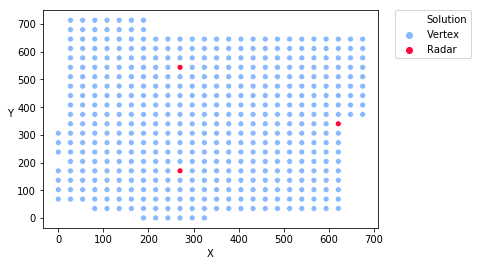

In [12]:
XSol3 = [198, 209, 452]
pointsData['Solution'] = 'Vertex'
pointsData.iloc[XSol3, 2] = 'Radar'

plotSol(pointsData)

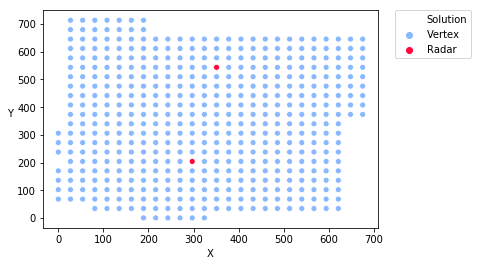

In [13]:
XSol2 = [219, 268]
pointsData['Solution'] = 'Vertex'
pointsData.iloc[XSol2, 2] = 'Radar'

plotSol(pointsData)

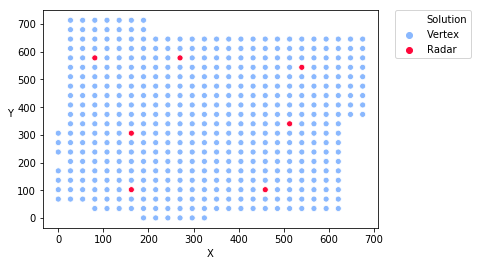

In [14]:
XSol7 = [63, 112, 401, 210, 118, 376, 331]
pointsData['Solution'] = 'Vertex'
pointsData.iloc[XSol7, 2] = 'Radar'

plotSol(pointsData)

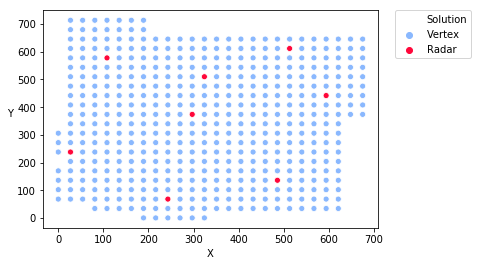

In [15]:
XSol8 = [12, 248, 351, 384, 436, 175, 224, 84]
pointsData['Solution'] = 'Vertex'
pointsData.iloc[XSol8, 2] = 'Radar'

plotSol(pointsData)

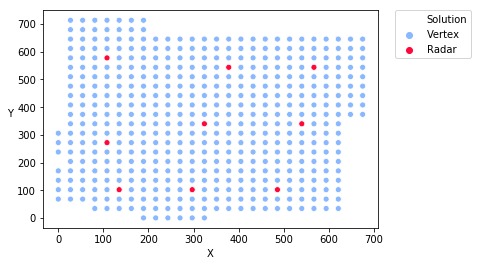

In [16]:
XSol9 = [243, 350, 395, 75, 216, 84, 91, 287, 420]
pointsData['Solution'] = 'Vertex'
pointsData.iloc[XSol9, 2] = 'Radar'

plotSol(pointsData)

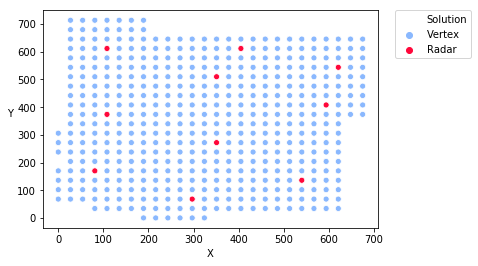

In [17]:
XSol10 = [51, 389, 435, 78, 215, 260, 267, 308, 458, 85]
pointsData['Solution'] = 'Vertex'
pointsData.iloc[XSol10, 2] = 'Radar'

plotSol(pointsData)

In [19]:
pointsData = pointsData.loc[:, ['X', 'Y']]
pointsRep = pd.concat([pointsData]*9, ignore_index=True)
pointsRep['# of Radars'] = np.concatenate((np.repeat(2, 480),
                                          np.repeat(3, 480),
                                          np.repeat(4, 480),
                                          np.repeat(5, 480),
                                          np.repeat(6, 480),
                                          np.repeat(7, 480),
                                          np.repeat(8, 480),
                                          np.repeat(9, 480),
                                          np.repeat(10, 480)))
pointsRep['Solution'] = 'Vertex'
#pointsRep.head()

In [20]:
# 0 to 4319 row indexes -> 480 * 9 - 1
XSol3 = [x + 480 for x in XSol3]
XSol4 = [x + 480*2 for x in XSol4]
XSol5 = [x + 480*3 for x in XSol5]
XSol6 = [x + 480*4 for x in XSol200]
XSol7 = [x + 480*5 for x in XSol7]
XSol8 = [x + 480*6 for x in XSol8]
XSol9 = [x + 480*7 for x in XSol9]
XSol10 = [x + 480*8 for x in XSol10]

In [21]:
pointsRep.iloc[XSol2, 3] = 'Radar'
pointsRep.iloc[XSol3, 3] = 'Radar'
pointsRep.iloc[XSol4, 3] = 'Radar'
pointsRep.iloc[XSol5, 3] = 'Radar'
pointsRep.iloc[XSol6, 3] = 'Radar'
pointsRep.iloc[XSol7, 3] = 'Radar'
pointsRep.iloc[XSol8, 3] = 'Radar'
pointsRep.iloc[XSol9, 3] = 'Radar'
pointsRep.iloc[XSol10, 3] = 'Radar'

In [26]:
pointsRep.head()
pointsRep.tail()

,X,Y,# of Radars,Solution
4315,675,510,10,Vertex
4316,675,544,10,Vertex
4317,675,578,10,Vertex
4318,675,612,10,Vertex
4319,675,646,10,Vertex


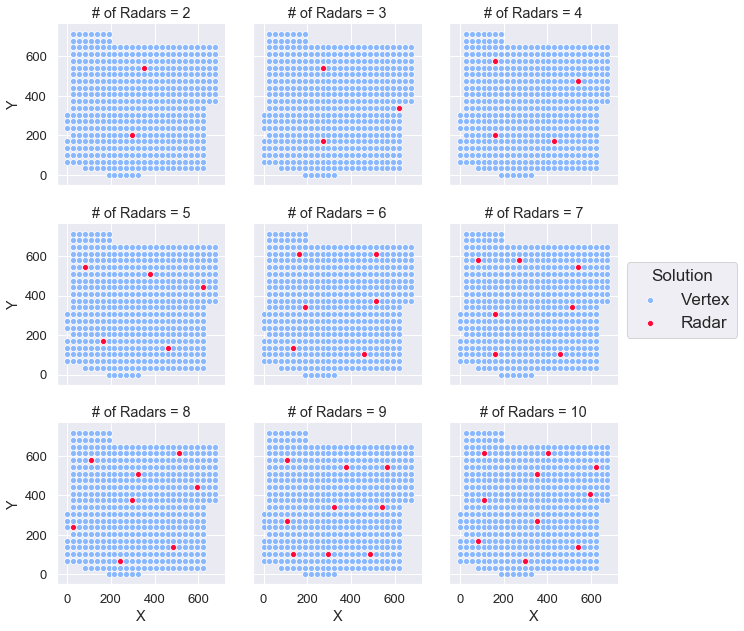

In [23]:
sns.set(font_scale = 1.2)
g = sns.FacetGrid(pointsRep, col="# of Radars",  col_wrap = 3, hue='Solution', palette = sns.color_palette(colorChoices))
    
g = (g.map(sns.scatterplot, 'X', 'Y'))
plt.legend(fontsize = 17, title = 'Solution', title_fontsize = 17,
           bbox_to_anchor=(1.05, 2), loc=2, borderaxespad=0.)
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#ax.set_ylabel('Y', rotation=0, horizontalalignment = 'right')

In [56]:
Longs = np.arange(114.5, 101.5, -0.5)
Lats = np.concatenate((np.array([31.3]), np.array(np.arange(32, 42.5, 0.5))))
print(Longs)
print(Lats)

# maybe add the bloody map, dumb dumb
#from mpl_toolkits.basemap import Basemap

[114.5 114.  113.5 113.  112.5 112.  111.5 111.  110.5 110.  109.5 109.
 108.5 108.  107.5 107.  106.5 106.  105.5 105.  104.5 104.  103.5 103.
 102.5 102. ]
[31.3 32.  32.5 33.  33.5 34.  34.5 35.  35.5 36.  36.5 37.  37.5 38.
 38.5 39.  39.5 40.  40.5 41.  41.5 42. ]


In [61]:
pointsRep['Longitude'] = [Longs[int(x / 27)] for x in pointsRep.loc[:, 'X']]
pointsRep['Latitude'] = [Lats[int(x / 34)] for x in pointsRep.loc[:, 'Y']]
print(pointsRep.head())
pointsRep.tail()

   X    Y  # of Radars Solution  Longitude  Latitude
0  0   68            2   Vertex      114.5      32.5
1  0  102            2   Vertex      114.5      33.0
2  0  136            2   Vertex      114.5      33.5
3  0  170            2   Vertex      114.5      34.0
4  0  238            2   Vertex      114.5      35.0


,X,Y,# of Radars,Solution,Longitude,Latitude
4315,675,510,10,Vertex,102.0,39.0
4316,675,544,10,Vertex,102.0,39.5
4317,675,578,10,Vertex,102.0,40.0
4318,675,612,10,Vertex,102.0,40.5
4319,675,646,10,Vertex,102.0,41.0


In [62]:
pointsRep.to_csv('LatLongPointsData.csv')